In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels import robust


In [53]:
df_user_logs = pd.read_csv("user_logs.csv",nrows=180000 , parse_dates = ['date'])

In [54]:
df_user_logs.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,2015-05-13,0,0,0,0,1,1,280.335
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,2015-07-09,9,1,0,0,7,11,1658.948
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-01-05,3,3,0,0,68,36,17364.956
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-03-06,1,0,1,1,97,27,24667.317
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-05-01,3,0,0,0,38,38,9649.029


#### What is The Size of Our Dataset ?

In [10]:
df_user_logs.shape

(180000, 9)

##### We have 180 k rows , datapoints and 9 features

#### Is Each of 180k rows corresponding to a unique users ?

In [11]:
## Store Each unique users as per msno in array and then evaluate shape 
pd.unique(df_user_logs['msno']).shape

(35230,)

#### Out of 180 k rows roughly 35 k are unique , as we can clearly see that data is date wise collected so definitely a user can have multiple entries for  given date

### Lets Analyse Each Features Step by Step

### 1. num_25: # of songs played less than 25% of the song length


##### What is max Value of num_25 ?


In [12]:
df_user_logs['num_25'].max()

653

#### What is min Value of num_25

In [13]:
df_user_logs['num_25'].min()

0

#### What is Median of num_25

In [14]:
df_user_logs['num_25'].median()

2.0

#### Lets Plot Histogram of This Features

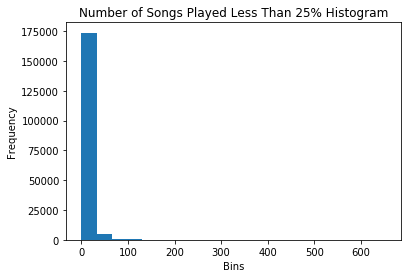

In [42]:
# https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
counts , bin_edges = np.histogram(df_user_logs['num_25'],bins =10 , density = True) 
plt.hist(df_user_logs['num_25'] , bins = 20)
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Number of Songs Played Less Than 25% Histogram")
plt.show()

#### Majority of Values Lies Between 0 to 60(approx) There are Very Few Values from 90 onwards , Most of the number of  songs played less than 25 % lie between 0 and 60-70(approx) window

### Lets Plot probability density function and Cumulative Density Function

[9.91738889e-01 6.91666667e-03 9.16666667e-04 2.77777778e-04
 5.55555556e-05 4.44444444e-05 5.55555556e-06 1.66666667e-05
 1.66666667e-05 1.11111111e-05]
[  0.   65.3 130.6 195.9 261.2 326.5 391.8 457.1 522.4 587.7 653. ]


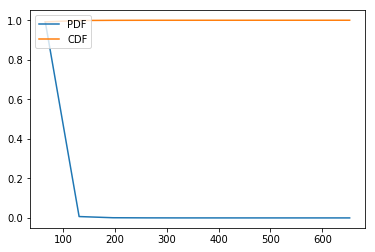

In [43]:
# refrence : https://www.youtube.com/watch?v=MEvYZiz-mK4&list=PLupD_xFct8mFDeCqoUAWZpUddeqmT28_L&index=5
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label ="PDF");
plt.plot(bin_edges[1:], cdf , label = "CDF")
plt.legend(loc="upper left")
plt.show()

### Lets Now Do Analysis for Num_75 : Number of Songs Played 50- 75 % of Length

#### Basic Statsitics of Num_75 feature

In [39]:
print("Mean Value of Num_75 feature is" , np.mean(df_user_logs["num_75"]))
print("Median Value of Num_75 feature is" , np.median(df_user_logs["num_75"]))
print("Maximum Value of Num_75 feature is" , np.max(df_user_logs["num_75"]))
print("Minimum Value of Num_75 feature is" , np.min(df_user_logs["num_75"]))
print("Standard Deviation of Num_75 feature is" , np.std(df_user_logs["num_75"]))


Mean Value of Num_75 feature is 1.0098833333333332
Median Value of Num_75 feature is 0.0
Maximum Value of Num_75 feature is 123
Minimum Value of Num_75 feature is 0
Standard Deviation of Num_75 feature is 2.0654020560302184


#### Lets Compute Percentiles and Quantiles

In [31]:
print("25 % of Num_75 values lies below ",np.percentile(df_user_logs["num_75"],q=25)) # computing 25th Percentile -->1st Quantile
print("50 % of Num_75 values lies below ",np.percentile(df_user_logs["num_75"],q=50)) # computing 50th Percentile --> 2nd Quantile
print("75 % of Num_75 values lies below ",np.percentile(df_user_logs["num_75"],q=75)) # computing 75th Percentile --> 3rd Quantile
print("95 % of Num_75 values lies below ",np.percentile(df_user_logs["num_75"],q=95)) # computing 95th Percentile
print("99 % of Num_75 values lies below ",np.percentile(df_user_logs["num_75"],q=99)) # computing 95th Percentile

25 % of Num_75 values lies below  0.0
50 % of Num_75 values lies below  0.0
75 % of Num_75 values lies below  1.0
95 % of Num_75 values lies below  4.0
99 % of Num_75 values lies below  8.0


#### Interpretation:
1. For Songs Played between 50-75% of length ,  25 % of values have values less than or equal to 0
2. For Songs Played between 50-75% of length, 50 % of values have values less than or equal to 1
3. For Songs Played between 50-75% of length, 95 % of values have values less than or equal to 4

### Lets Compare This Values of Percentiles with Num_50 which corresponds to number of songs played between 25-50% of Song Length

In [34]:
print("25 % of Num_50 values lies below ",np.percentile(df_user_logs["num_50"],q=25)) # computing 25th Percentile -->1st Quantile
print("50 % of Num_50 values lies below ",np.percentile(df_user_logs["num_50"],q=50)) # computing 50th Percentile --> 2nd Quantile
print("75 % of Num_50 values lies below ",np.percentile(df_user_logs["num_50"],q=75)) # computing 75th Percentile --> 3rd Quantile
print("95 % of Num_50 values lies below ",np.percentile(df_user_logs["num_50"],q=95)) # computing 95th Percentile
print("99 % of Num_50 values lies below ",np.percentile(df_user_logs["num_50"],q=99)) # computing 95th Percentile

25 % of Num_50 values lies below  0.0
50 % of Num_50 values lies below  1.0
75 % of Num_50 values lies below  2.0
95 % of Num_50 values lies below  6.0
99 % of Num_50 values lies below  16.0


#### Interpretation:
1. For Songs Played between 25-50% of length ,  25 % of values have values less than or equal to 0
2. For Songs Played between 25-50% of length, 50 % of values have values less than or equal to 2
3. For Songs Played between 25-50% of length, 95 % of values have values less than or equal to 6

When We compare this num_50 feature definitley this numbers looks comparatively big , num_25 feature should also have this kind of trend and should have bigger values of percentiles than num_50 , Lets check

In [35]:
print("25 % of Num_25 values lies below ",np.percentile(df_user_logs["num_25"],q=25)) # computing 25th Percentile -->1st Quantile
print("50 % of Num_25 values lies below ",np.percentile(df_user_logs["num_25"],q=50)) # computing 50th Percentile --> 2nd Quantile
print("75 % of Num_25 values lies below ",np.percentile(df_user_logs["num_25"],q=75)) # computing 75th Percentile --> 3rd Quantile
print("95 % of Num_25 values lies below ",np.percentile(df_user_logs["num_25"],q=95)) # computing 95th Percentile
print("99 % of Num_25 values lies below ",np.percentile(df_user_logs["num_25"],q=99)) # computing 95th Percentile

25 % of Num_25 values lies below  0.0
50 % of Num_25 values lies below  2.0
75 % of Num_25 values lies below  7.0
95 % of Num_25 values lies below  26.0
99 % of Num_25 values lies below  60.0


### As we expected , We get significantly Higher Numbers

### Lets Analyze 98.5 % Feature , which is number of songs played between 75% to 98.5% of the song length

#### Basic Statistics of 98.5 %

In [38]:
print("Mean Value of Num_985 feature is" , np.mean(df_user_logs["num_985"]))
print("Median Value of Num_985 feature is" , np.median(df_user_logs["num_985"]))
print("Maximum Value of Num_985 feature is" , np.max(df_user_logs["num_985"]))
print("Minimum Value of Num_985 feature is" , np.min(df_user_logs["num_985"]))
print("Standard Deviation of Num_985 feature is" , np.std(df_user_logs["num_985"]))
print("Median Absolute Deviation of Num_985 Feature is " , robust.mad(df_user_logs['num_985']))

Mean Value of Num_985 feature is 1.1447222222222222
Median Value of Num_985 feature is 0.0
Maximum Value of Num_985 feature is 327
Minimum Value of Num_985 feature is 0
Standard Deviation of Num_985 feature is 3.1392567999695093
Median Absolute Deviation of Num_985 Feature is  0.0


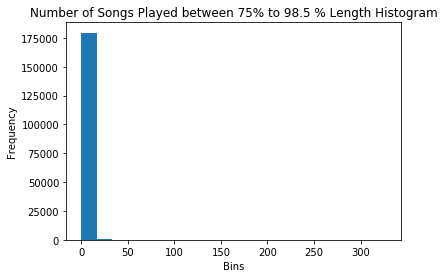

In [44]:
# https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
counts , bin_edges = np.histogram(df_user_logs['num_985'],bins =10 , density = True) 
plt.hist(df_user_logs['num_985'] , bins = 20)
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Number of Songs Played between 75% to 98.5 % Length Histogram")
plt.show()

#### Observations:
1. We get more Peaked Histogram as compared to num_25 feature 
2. An intutive reasoning for this can be there are very few instances that a users listens very few songs between 75% to 98.5 % of Length.
3. This is very much similar to our behaviour on Youtube , We Watch very Few Videos Completely or till completion and we just watch many videos for less duration.
4. Infact instead of watching many videos completely we prefer watching some videos completely and majority of videos partially

#### PDF for Num_985 Feature

[9.99111111e-01 6.16666667e-04 1.27777778e-04 6.66666667e-05
 3.33333333e-05 5.55555556e-06 2.22222222e-05 5.55555556e-06
 5.55555556e-06 5.55555556e-06]
[  0.   32.7  65.4  98.1 130.8 163.5 196.2 228.9 261.6 294.3 327. ]


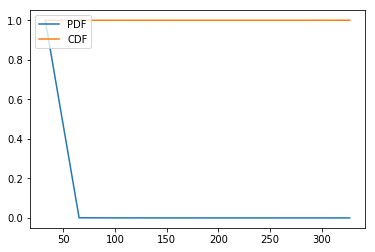

In [45]:
# refrence : https://www.youtube.com/watch?v=MEvYZiz-mK4&list=PLupD_xFct8mFDeCqoUAWZpUddeqmT28_L&index=5
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label ="PDF");
plt.plot(bin_edges[1:], cdf , label = "CDF")
plt.legend(loc="upper left")
plt.show()

#### Percentiles for num_985 feature

In [50]:
print("25 % of Num_985 values lies below ",np.percentile(df_user_logs["num_985"],q=25)) # computing 25th Percentile -->1st Quantile
print("50 % of Num_985 values lies below ",np.percentile(df_user_logs["num_985"],q=50)) # computing 50th Percentile --> 2nd Quantile
print("75 % of Num_985 values lies below ",np.percentile(df_user_logs["num_985"],q=75)) # computing 75th Percentile --> 3rd Quantile
print("95 % of Num_985 values lies below ",np.percentile(df_user_logs["num_985"],q=95)) # computing 95th Percentile
print("99 % of Num_985 values lies below ",np.percentile(df_user_logs["num_985"],q=99)) # computing 99th Percentile

25 % of Num_985 values lies below  0.0
50 % of Num_985 values lies below  0.0
75 % of Num_985 values lies below  1.0
95 % of Num_985 values lies below  4.0
99 % of Num_985 values lies below  10.0


### Boxplots and Violin Plots of num_ type features

##### We will plot box and whisker plots of all num_ type features so tha we are able to see all comparison in single plot [do it after light comes back]

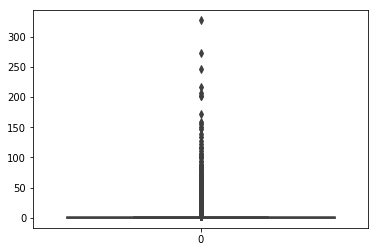

In [49]:
sns.boxplot(data=df_user_logs["num_985"])
plt.show()

#### Analysis of num_unq Feature

1. Num Unique Corresponds to Number of unique songs played in a day
2. We will analyze this data in 2 levels.
    a. First we will analyze at day level which is provided as per dataset
    b. Next we will analyze it at User level 

### Day-Level Wise Analysis of Number of Unqiue Songs Played in a Day

In [56]:
print("Maximum Number of Unique Songs Played in a Day are :", np.max(df_user_logs['num_unq']))
print("Minimum Number of Unique Songs Played in a Day are :", np.min(df_user_logs['num_unq']))
print("Mean Number of Unique Songs Played in a Day are :", np.mean(df_user_logs['num_unq']))
print("Median Number of Unique Songs Played in a Day are :", np.median(df_user_logs['num_unq']))
print("Standard Deviation for Number of Unique Songs Played in a Day is :" , np.std(df_user_logs['num_unq']))

Maximum Number of Unique Songs Played in a Day are : 929
Minimum Number of Unique Songs Played in a Day are : 1
Mean Number of Unique Songs Played in a Day are : 30.080005555555555
Median Number of Unique Songs Played in a Day are : 19.0
Standard Deviation for Number of Unique Songs Played in a Day is : 33.66035261253726


In [63]:
## Lets Get the msno or id of the person who played maximum song in a Day Later when doing user level analysis we will 
## Just check whether this person also is the Maximum song Playing Person overall
index  = df_user_logs["num_unq"].idxmax()
user_max_song_daywise = df_user_logs.loc[index]['msno']
print(user_max_song_daywise)

rUxUyEOOFEBqqv0kHx6BSOXNkbIDohyo9zHThFCuaVg=


#### Histogram , PDF and CDF for Num_unq 

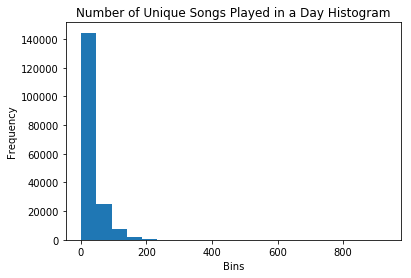

In [65]:
# https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
counts , bin_edges = np.histogram(df_user_logs['num_unq'],bins =10 , density = True) 
plt.hist(df_user_logs['num_unq'] , bins = 20)
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Number of Unique Songs Played in a Day Histogram")
plt.show()

[9.40783333e-01 5.53333333e-02 3.33333333e-03 4.33333333e-04
 8.33333333e-05 5.55555556e-06 1.11111111e-05 1.11111111e-05
 0.00000000e+00 5.55555556e-06]
[  1.   93.8 186.6 279.4 372.2 465.  557.8 650.6 743.4 836.2 929. ]


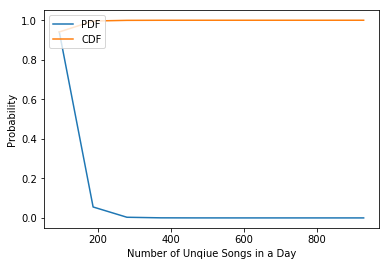

In [67]:
# refrence : https://www.youtube.com/watch?v=MEvYZiz-mK4&list=PLupD_xFct8mFDeCqoUAWZpUddeqmT28_L&index=5
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label ="PDF");
plt.plot(bin_edges[1:], cdf , label = "CDF")
plt.xlabel("Number of Unqiue Songs in a Day")
plt.ylabel("Probability")
plt.legend(loc="upper left")
plt.show()

#### Observations
1. The Probability of Finding User Who Played 200 unique songs is a Day is very less nearly 10 % 

#### Percentiles and Quantiles of Number of Unique Songs 


In [68]:
print("25 % of num_unq values lies below ",np.percentile(df_user_logs["num_unq"],q=25)) # computing 25th Percentile -->1st Quantile
print("50 % of num_unq values lies below ",np.percentile(df_user_logs["num_unq"],q=50)) # computing 50th Percentile --> 2nd Quantile
print("75 % of num_unq values lies below ",np.percentile(df_user_logs["num_unq"],q=75)) # computing 75th Percentile --> 3rd Quantile
print("95 % of num_unq values lies below ",np.percentile(df_user_logs["num_unq"],q=95)) # computing 95th Percentile
print("99 % of num_unq values lies below ",np.percentile(df_user_logs["num_unq"],q=99)) # computing 95th Percentile

25 % of num_unq values lies below  8.0
50 % of num_unq values lies below  19.0
75 % of num_unq values lies below  40.0
95 % of num_unq values lies below  100.0
99 % of num_unq values lies below  155.0


### Interpretation:
1. Almost 50 % of users play less than or equal to 19 unique songs a Day
2. Almost 75 % of users play Less than or equal to 40 unique songs a Day

#### User Level Analysis of Number of Total Number of  Songs 

In [73]:
df_user_logs_user_level  = df_user_logs.groupby('msno').agg('sum')

In [74]:
df_user_logs_user_level.shape

(35230, 7)

In [75]:
## We have already seen that we have nearly 35k unique users 

In [76]:
df_user_logs_user_level.head()

,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
msno,,,,,,,
+++dz9ZCWE2HB/47pJU82NJXQzQuZDx1Wm50YSk/kKk=,3,0,0,1,65,54,17132.904
++95tJZADNg8U8HKbYdxbbXIRsO6pw1zBK4tHI7BtZo=,29,14,6,8,292,177,80090.402
++CITmZPtQDWOi01uceGb75QJblInDRhjjGM1MmsiSY=,10,1,0,1,6,14,2131.666
++NvYbtVD+fgVuflK0hgYV/Y1WA2aYbmmRbCGAQkdPU=,13,1,2,2,6,24,2628.060
++QohuN0HbDVSH0a9EEtv/QJ2ORrQuKnYlIDRrWHspk=,0,0,0,0,3,3,724.746


In [84]:
print("Maximum Number of  Songs Played by a User are :", np.max(df_user_logs_user_level['num_unq']))
print("Minimum Number of  Songs Played by a User are :", np.min(df_user_logs_user_level['num_unq']))
print("Mean Number of  Songs Played by a User are :", np.mean(df_user_logs_user_level['num_unq']))
print("Median Number of  Songs Played by a User are :", np.median(df_user_logs_user_level['num_unq']))
print("Standard Deviation for Number of  Songs played by a User is :" , np.std(df_user_logs_user_level['num_unq']))

Maximum Number of  Songs Played by a User are : 3371
Minimum Number of  Songs Played by a User are : 1
Mean Number of  Songs Played by a User are : 153.68722679534488
Median Number of  Songs Played by a User are : 75.0
Standard Deviation for Number of  Songs played by a User is : 211.78013468817022


In [85]:
## Lets Get the msno or id of the person who played maximum song in a Day Later when doing user level analysis we will 
## Just check whether this person also is the Maximum song Playing Person overall
df_user_logs_user_level = df_user_logs_user_level.reset_index()
index  = df_user_logs_user_level["num_unq"].idxmax()
user_max_song = df_user_logs_user_level.loc[index]['msno']
print("User who Played Max Number of  Songs Overall",user_max_song)
print("User who Played Max Number of Unique Songs in a Day",user_max_song_daywise)


User who Played Max Number of  Songs Overall LJ+VUoy5yvyFzxa3DrVzH3m++FCP39fNFKvahfcKulo=
User who Played Max Number of Unique Songs in a Day rUxUyEOOFEBqqv0kHx6BSOXNkbIDohyo9zHThFCuaVg=


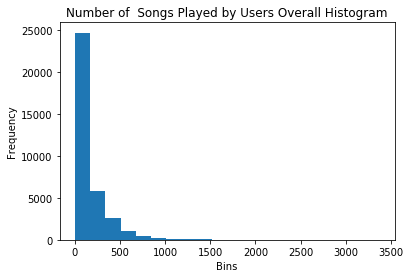

In [88]:
# https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
counts , bin_edges = np.histogram(df_user_logs_user_level['num_unq'],bins =10 , density = True) 
plt.hist(df_user_logs_user_level['num_unq'] , bins = 20)
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Number of  Songs Played by Users Overall Histogram")
plt.show()

#### Observations : 
1. Most Users Have Played Roughly Between 0 - 100 songs
2. Very Few Users Played more than 200 unique songs overall

[8.65966506e-01 1.02696565e-01 2.20834516e-02 6.15952313e-03
 1.98694295e-03 5.96082884e-04 2.27079194e-04 1.70309395e-04
 8.51546977e-05 2.83848992e-05]
[1.000e+00 3.380e+02 6.750e+02 1.012e+03 1.349e+03 1.686e+03 2.023e+03
 2.360e+03 2.697e+03 3.034e+03 3.371e+03]


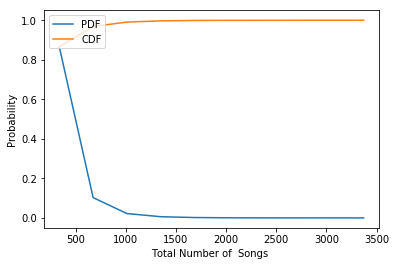

In [89]:
# refrence : https://www.youtube.com/watch?v=MEvYZiz-mK4&list=PLupD_xFct8mFDeCqoUAWZpUddeqmT28_L&index=5
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label ="PDF");
plt.plot(bin_edges[1:], cdf , label = "CDF")
plt.xlabel("Total Number of  Songs ")
plt.ylabel("Probability")
plt.legend(loc="upper left")
plt.show()

### Observations : 
1. Very High probability of Finding Users Playing Less than 500 unique Songs Overall
2. Probabilty of Finding people who Played more than 500 songs overall decreases linearly till 1000 .
3. Probability of Finding people who Played more than 1000 songs is constant and is very less 

In [90]:
print("25 % of num_unq values lies below ",np.percentile(df_user_logs_user_level["num_unq"],q=25)) # computing 25th Percentile -->1st Quantile
print("50 % of num_unq values lies below ",np.percentile(df_user_logs_user_level["num_unq"],q=50)) # computing 50th Percentile --> 2nd Quantile
print("75 % of num_unq values lies below ",np.percentile(df_user_logs_user_level["num_unq"],q=75)) # computing 75th Percentile --> 3rd Quantile
print("95 % of num_unq values lies below ",np.percentile(df_user_logs_user_level["num_unq"],q=95)) # computing 95th Percentile
print("99 % of num_unq values lies below ",np.percentile(df_user_logs_user_level["num_unq"],q=99)) # computing 99th Percentile

25 % of num_unq values lies below  19.0
50 % of num_unq values lies below  75.0
75 % of num_unq values lies below  205.0
95 % of num_unq values lies below  557.0
99 % of num_unq values lies below  992.0


#### Observations:
1. 75% of User have played less than 205 songs
2. 99 % of users have played less than 992 songs

### Conclusions:
1. Here We only focused on User_logs table and did Eda , Univariate analysis and simple statsitics on the features.
2. We can get More Creative and More Useful Eda by Following Steps Below.
3. [Objective Based ]We can join this table with train.csv on msno to get some insights into behaviour of churn users like what are total songs played by churn users etc , etc . However we have to first aggregate data in users_logs as it is day wise provided.[We have to Use Dask Dataframes for this purpose as it is only way to avoid Nans ], For Eda You Can Drop Nans and do some modification it will work , but for modelling it is better to use dask dataframes as it will allow you to work with more data
4. [Non Objective Based Just For Insights] We can join this data again by aggregating and joining with members.csv , we can get insight like which users listens to more songs like Male or Female or Which Age Group Listens to More Songs , But we have to do Pre-processing Carefully .

### Tommorow Aka 27th August Tasks:
1. Merge Transactions.csv and train.csv , to do churn based analysis of the features , do this on Kaggle Kernel as Dataset will
Easily Fit there


### 28th August Tasks:
1. Do Members + df_train aggregate analysis 
2. Do df_train + User_logs aggregate analysis (on local by dropping Na)
3. Finish All Eda Tasks By Tommorow
4. From Saturday onwards we will start looking for feature engineering ideas , Note: It is better to not reinvent wheel , try to use discussion and kernels section of kaggle extensively to see which features are used , also try to read online blogs of similar problems to get ideas into feature engineering.
5. [Most Importantly] Don't be in a rush to do modelling , as we just see without proper feature engineering modelling is of no sense , so first give time to feature engineering and once feature engineering is done modelling is just straightforward , Hardly 2 - 3 Lines of Codechange don't worry about it